## Sin곡선을 예측하는 순환신경망 LSTM 모델의 사용 

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import time

import numpy as np
import pandas as pd

from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.layers import Flatten, LSTM, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline

In [2]:
# timestep 만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
    x, y = list(), list()

    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break
            
        # seq_x: 0 ~ 14, seq_y: 15
        # seq_x: 1~ 15, seq_y: 16
        # seq_x: 2~ 16, seq_y: 17
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)

    return np.array(x), np.array(y)

In [3]:
# sin 함수 학습 데이터
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

In [4]:
# 하이퍼파라미터
n_timesteps = 15 # 입력 시퀀스 길이, 메모리셀은 15개가됨.
n_features = 1   # 변수의 갯수 1개, 특성 벡터의 갯수

# 시퀀스 나누기
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x, train_y = split_sequence(train_y, step=n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

shape x:(185, 15) / y:(185,)


In [5]:
# RNN 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

train_x.shape = (185, 15, 1)
train_y.shape = (185,)


In [6]:
# LSTM 모델 정의
model = Sequential()
# units=10: rnn 계층에 존재하는 전체 뉴런수
# return_sequences=False: 은닉 상태값을 출력할지 결정
# False: 마지막 시점의 메모리 셀에서만 결과를 출력, True: 모든 rnn 계산과정에서 결과를 출력
# return_sequences는 다층 구조의 rnn 모델이나 one-to-many, many-to-many구조에서 사용
# input_shape=(n_timesteps, n_features): 입력 시퀀스 길이, 변수의 갯수
model.add(LSTM(units=10, return_sequences=False, input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 학습
es = EarlyStopping(monitor='loss', patience=5, verbose=1, restore_best_weights=True)
mc = ModelCheckpoint('./LSTM.h5', monitor='loss', verbose=1, save_best_only=True)

start = time.time()
hist = model.fit(train_x, train_y, validation_split=0.3, 
                 shuffle=True, epochs=1000, callbacks=[es, mc])
print('time:', time.time() - start)

Epoch 1/1000
5/5 [==============================] - 3s 300ms/step - loss: 0.8013 - val_loss: 0.7204

Epoch 00001: loss improved from inf to 0.77492, saving model to .\LSTM.h5
Epoch 2/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.6769 - val_loss: 0.6631

Epoch 00002: loss improved from 0.77492 to 0.71056, saving model to .\LSTM.h5
Epoch 3/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.6701 - val_loss: 0.6106

Epoch 00003: loss improved from 0.71056 to 0.65554, saving model to .\LSTM.h5
Epoch 4/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.5798 - val_loss: 0.5645

Epoch 00004: loss improved from 0.65554 to 0.60408, saving model to .\LSTM.h5
Epoch 5/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.5725 - val_loss: 0.5212

Epoch 00005: loss improved from 0.60408 to 0.55777, saving model to .\LSTM.h5
Epoch 6/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.4982 - val_loss: 0.4803

Epoch 00006: 

5/5 [==============================] - 0s 15ms/step - loss: 0.0521 - val_loss: 0.0511

Epoch 00047: loss improved from 0.05415 to 0.05080, saving model to .\LSTM.h5
Epoch 48/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0447 - val_loss: 0.0476

Epoch 00048: loss improved from 0.05080 to 0.04728, saving model to .\LSTM.h5
Epoch 49/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0447 - val_loss: 0.0445

Epoch 00049: loss improved from 0.04728 to 0.04435, saving model to .\LSTM.h5
Epoch 50/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0438 - val_loss: 0.0419

Epoch 00050: loss improved from 0.04435 to 0.04188, saving model to .\LSTM.h5
Epoch 51/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0392 - val_loss: 0.0396

Epoch 00051: loss improved from 0.04188 to 0.03932, saving model to .\LSTM.h5
Epoch 52/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0392 - val_loss: 0.0372

Epoch 00052: loss 

5/5 [==============================] - 0s 15ms/step - loss: 0.0034 - val_loss: 0.0035

Epoch 00093: loss improved from 0.00338 to 0.00334, saving model to .\LSTM.h5
Epoch 94/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0031 - val_loss: 0.0034

Epoch 00094: loss improved from 0.00334 to 0.00321, saving model to .\LSTM.h5
Epoch 95/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0030 - val_loss: 0.0034

Epoch 00095: loss improved from 0.00321 to 0.00315, saving model to .\LSTM.h5
Epoch 96/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0030 - val_loss: 0.0032

Epoch 00096: loss improved from 0.00315 to 0.00303, saving model to .\LSTM.h5
Epoch 97/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0028 - val_loss: 0.0030

Epoch 00097: loss improved from 0.00303 to 0.00285, saving model to .\LSTM.h5
Epoch 98/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0026 - val_loss: 0.0028

Epoch 00098: loss 

5/5 [==============================] - 0s 16ms/step - loss: 0.0011 - val_loss: 0.0012

Epoch 00142: loss improved from 0.00116 to 0.00113, saving model to .\LSTM.h5
Epoch 143/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 0.0012

Epoch 00143: loss improved from 0.00113 to 0.00107, saving model to .\LSTM.h5
Epoch 144/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 0.0012

Epoch 00144: loss improved from 0.00107 to 0.00107, saving model to .\LSTM.h5
Epoch 145/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0010 - val_loss: 0.0012

Epoch 00145: loss did not improve from 0.00107
Epoch 146/1000
5/5 [==============================] - 0s 16ms/step - loss: 0.0010 - val_loss: 0.0012

Epoch 00146: loss did not improve from 0.00107
Epoch 147/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 0.0011

Epoch 00147: loss did not improve from 0.00107
Epoch 148/1000
5/5 [========


Epoch 00188: loss did not improve from 0.00051
Epoch 189/1000
5/5 [==============================] - 0s 18ms/step - loss: 5.1331e-04 - val_loss: 6.2592e-04

Epoch 00189: loss did not improve from 0.00051
Epoch 190/1000
5/5 [==============================] - 0s 17ms/step - loss: 5.4940e-04 - val_loss: 5.8155e-04

Epoch 00190: loss did not improve from 0.00051
Epoch 191/1000
5/5 [==============================] - 0s 25ms/step - loss: 4.8328e-04 - val_loss: 5.1389e-04

Epoch 00191: loss improved from 0.00051 to 0.00049, saving model to .\LSTM.h5
Epoch 192/1000
5/5 [==============================] - 0s 18ms/step - loss: 4.7114e-04 - val_loss: 4.9094e-04

Epoch 00192: loss improved from 0.00049 to 0.00045, saving model to .\LSTM.h5
Epoch 193/1000
5/5 [==============================] - 0s 18ms/step - loss: 4.2332e-04 - val_loss: 4.7752e-04

Epoch 00193: loss improved from 0.00045 to 0.00043, saving model to .\LSTM.h5
Epoch 194/1000
5/5 [==============================] - 0s 17ms/step - loss:

5/5 [==============================] - 0s 17ms/step - loss: 1.8852e-04 - val_loss: 2.1585e-04

Epoch 00235: loss improved from 0.00020 to 0.00020, saving model to .\LSTM.h5
Epoch 236/1000
5/5 [==============================] - ETA: 0s - loss: 1.9461e-0 - 0s 18ms/step - loss: 1.8885e-04 - val_loss: 2.2499e-04

Epoch 00236: loss improved from 0.00020 to 0.00019, saving model to .\LSTM.h5
Epoch 237/1000
5/5 [==============================] - 0s 17ms/step - loss: 1.9806e-04 - val_loss: 2.2480e-04

Epoch 00237: loss did not improve from 0.00019
Epoch 238/1000
5/5 [==============================] - 0s 18ms/step - loss: 2.0175e-04 - val_loss: 2.0542e-04

Epoch 00238: loss did not improve from 0.00019
Epoch 239/1000
5/5 [==============================] - 0s 17ms/step - loss: 1.9176e-04 - val_loss: 2.0466e-04

Epoch 00239: loss improved from 0.00019 to 0.00018, saving model to .\LSTM.h5
Epoch 240/1000
5/5 [==============================] - 0s 19ms/step - loss: 1.9634e-04 - val_loss: 2.2951e-04



Epoch 00282: loss did not improve from 0.00009
Epoch 283/1000
5/5 [==============================] - 0s 16ms/step - loss: 1.1223e-04 - val_loss: 9.9089e-05

Epoch 00283: loss did not improve from 0.00009
Epoch 284/1000
5/5 [==============================] - 0s 16ms/step - loss: 8.7556e-05 - val_loss: 1.0159e-04

Epoch 00284: loss improved from 0.00009 to 0.00009, saving model to .\LSTM.h5
Epoch 285/1000
5/5 [==============================] - 0s 15ms/step - loss: 9.4656e-05 - val_loss: 1.0844e-04

Epoch 00285: loss did not improve from 0.00009
Epoch 286/1000
5/5 [==============================] - 0s 17ms/step - loss: 1.0840e-04 - val_loss: 1.0294e-04

Epoch 00286: loss did not improve from 0.00009
Epoch 287/1000
5/5 [==============================] - 0s 16ms/step - loss: 8.2340e-05 - val_loss: 9.2108e-05

Epoch 00287: loss improved from 0.00009 to 0.00009, saving model to .\LSTM.h5
Epoch 288/1000
5/5 [==============================] - 0s 17ms/step - loss: 8.3090e-05 - val_loss: 9.4297e

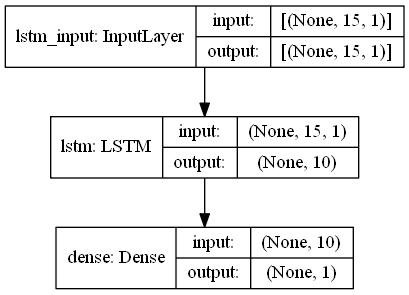

In [8]:
plot_model(model, show_shapes=True, show_layer_names=True)

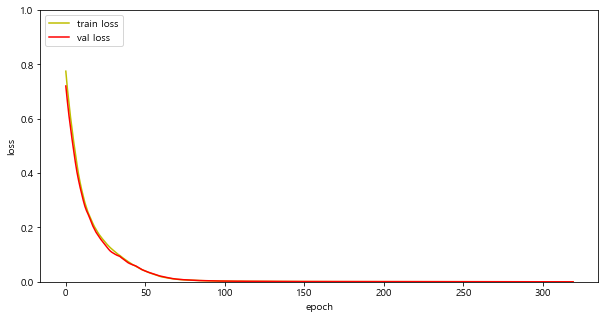

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.0]) # 값을 반영하여 변경

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()

In [9]:
# 테스트 데이터셋 생성
test_x = np.arange(0, 10, 0.1)
# test_x = np.arange(10, 20, 0.1)
calc_y = np.sin(test_x) # 테스트 정답 데이터

In [16]:
# RNN 모델 예측 및 로그 저장
test_y = calc_y[:n_timesteps] # 0:15
for i in range(len(test_x) - n_timesteps):
    net_input = test_y[i : i + n_timesteps]
    net_input = net_input.reshape((1, n_timesteps, n_features)) # 1, 15, 1
    yp = model.predict(net_input, verbose=0) # 모델 사용
    print('yp:', yp)
    print(test_y.shape, yp.shape, i, i + n_timesteps)
    # test_y.shape: (15,), yp.shape: (1, 1), i: 0, i + n_timesteps: 15
    test_y = np.append(test_y, yp)
    print(test_y)

yp: [[0.98495024]]
(15,) (1, 1) 0 15
[0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691 0.84147098 0.89120736
 0.93203909 0.96355819 0.98544973 0.98495024]
yp: [[0.9822517]]
(16,) (1, 1) 1 16
[0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691 0.84147098 0.89120736
 0.93203909 0.96355819 0.98544973 0.98495024 0.9822517 ]
yp: [[0.970487]]
(17,) (1, 1) 2 17
[0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691 0.84147098 0.89120736
 0.93203909 0.96355819 0.98544973 0.98495024 0.9822517  0.970487  ]
yp: [[0.9497356]]
(18,) (1, 1) 3 18
[0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691 0.84147098 0.89120736
 0.93203909 0.96355819 0.98544973 0.98495024 0.9822517  0.970487
 0.94973558]
yp: [[0.92045844]]
(19,) (1, 1) 4 19
[0.         0.09983342 0.19866933 

yp: [[-0.74543357]]
(40,) (1, 1) 25 40
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.98495024  0.9822517   0.970487
  0.94973558  0.92045844  0.88313335  0.83813745  0.78571516  0.72600132
  0.65908962  0.58512574  0.50441289  0.41750813  0.32528558  0.22893976
  0.12991048  0.02988074 -0.06945793 -0.16672501 -0.26095474 -0.35162759
 -0.4385727  -0.52176327 -0.6010555  -0.67594433 -0.74543357]
yp: [[-0.80809814]]
(41,) (1, 1) 26 41
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.98495024  0.9822517   0.970487
  0.94973558  0.92045844  0.88313335  0.83813745  0.78571516  0.72600132
  0.65908962  0.58512574  0.50441289  0.41750813  0.32528558  0.22893976
  0.12991048  0.02988074 -0.06945793 -0.16672501 -0.26095474 

yp: [[-0.7311029]]
(54,) (1, 1) 39 54
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.98495024  0.9822517   0.970487
  0.94973558  0.92045844  0.88313335  0.83813745  0.78571516  0.72600132
  0.65908962  0.58512574  0.50441289  0.41750813  0.32528558  0.22893976
  0.12991048  0.02988074 -0.06945793 -0.16672501 -0.26095474 -0.35162759
 -0.4385727  -0.52176327 -0.6010555  -0.67594433 -0.74543357 -0.80809814
 -0.86235172 -0.90679812 -0.9404965  -0.96304137 -0.97449046 -0.97523135
 -0.96584731 -0.94700366 -0.91935867 -0.88350207 -0.83992392 -0.78901631
 -0.73110288]
yp: [[-0.66648376]]
(55,) (1, 1) 40 55
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.98495024  0.9822517   0.970487
  0.94973558  0.92045844  0.88313335 

yp: [[0.59556264]]
(69,) (1, 1) 54 69
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.98495024  0.9822517   0.970487
  0.94973558  0.92045844  0.88313335  0.83813745  0.78571516  0.72600132
  0.65908962  0.58512574  0.50441289  0.41750813  0.32528558  0.22893976
  0.12991048  0.02988074 -0.06945793 -0.16672501 -0.26095474 -0.35162759
 -0.4385727  -0.52176327 -0.6010555  -0.67594433 -0.74543357 -0.80809814
 -0.86235172 -0.90679812 -0.9404965  -0.96304137 -0.97449046 -0.97523135
 -0.96584731 -0.94700366 -0.91935867 -0.88350207 -0.83992392 -0.78901631
 -0.73110288 -0.66648376 -0.59548742 -0.5185166  -0.43608335 -0.34882876
 -0.25752002 -0.1630246  -0.06626564  0.03182578  0.1303383   0.22837074
  0.32498831  0.41916817  0.50977165  0.59556264]
yp: [[0.6752698]]
(70,) (1, 1) 55 70
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
 

yp: [[0.90496916]]
(82,) (1, 1) 67 82
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.98495024  0.9822517   0.970487
  0.94973558  0.92045844  0.88313335  0.83813745  0.78571516  0.72600132
  0.65908962  0.58512574  0.50441289  0.41750813  0.32528558  0.22893976
  0.12991048  0.02988074 -0.06945793 -0.16672501 -0.26095474 -0.35162759
 -0.4385727  -0.52176327 -0.6010555  -0.67594433 -0.74543357 -0.80809814
 -0.86235172 -0.90679812 -0.9404965  -0.96304137 -0.97449046 -0.97523135
 -0.96584731 -0.94700366 -0.91935867 -0.88350207 -0.83992392 -0.78901631
 -0.73110288 -0.66648376 -0.59548742 -0.5185166  -0.43608335 -0.34882876
 -0.25752002 -0.1630246  -0.06626564  0.03182578  0.1303383   0.22837074
  0.32498831  0.41916817  0.50977165  0.59556264  0.67526978  0.74766934
  0.81166518  0.86635154  0.91105449  0.94535428  0.96908587  0.98232305
  0.98534447  0

yp: [[0.28488612]]
(91,) (1, 1) 76 91
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.98495024  0.9822517   0.970487
  0.94973558  0.92045844  0.88313335  0.83813745  0.78571516  0.72600132
  0.65908962  0.58512574  0.50441289  0.41750813  0.32528558  0.22893976
  0.12991048  0.02988074 -0.06945793 -0.16672501 -0.26095474 -0.35162759
 -0.4385727  -0.52176327 -0.6010555  -0.67594433 -0.74543357 -0.80809814
 -0.86235172 -0.90679812 -0.9404965  -0.96304137 -0.97449046 -0.97523135
 -0.96584731 -0.94700366 -0.91935867 -0.88350207 -0.83992392 -0.78901631
 -0.73110288 -0.66648376 -0.59548742 -0.5185166  -0.43608335 -0.34882876
 -0.25752002 -0.1630246  -0.06626564  0.03182578  0.1303383   0.22837074
  0.32498831  0.41916817  0.50977165  0.59556264  0.67526978  0.74766934
  0.81166518  0.86635154  0.91105449  0.94535428  0.96908587  0.98232305
  0.98534447  0

yp: [[-0.47329074]]
(99,) (1, 1) 84 99
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.98495024  0.9822517   0.970487
  0.94973558  0.92045844  0.88313335  0.83813745  0.78571516  0.72600132
  0.65908962  0.58512574  0.50441289  0.41750813  0.32528558  0.22893976
  0.12991048  0.02988074 -0.06945793 -0.16672501 -0.26095474 -0.35162759
 -0.4385727  -0.52176327 -0.6010555  -0.67594433 -0.74543357 -0.80809814
 -0.86235172 -0.90679812 -0.9404965  -0.96304137 -0.97449046 -0.97523135
 -0.96584731 -0.94700366 -0.91935867 -0.88350207 -0.83992392 -0.78901631
 -0.73110288 -0.66648376 -0.59548742 -0.5185166  -0.43608335 -0.34882876
 -0.25752002 -0.1630246  -0.06626564  0.03182578  0.1303383   0.22837074
  0.32498831  0.41916817  0.50977165  0.59556264  0.67526978  0.74766934
  0.81166518  0.86635154  0.91105449  0.94535428  0.96908587  0.98232305
  0.98534447  

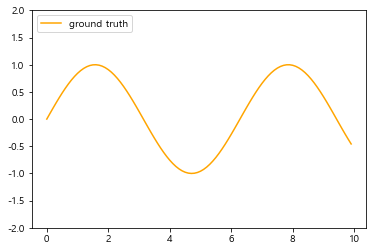

In [11]:
# 정답 그래프 출력
plt.plot(test_x, calc_y, label="ground truth", color="orange") # target
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

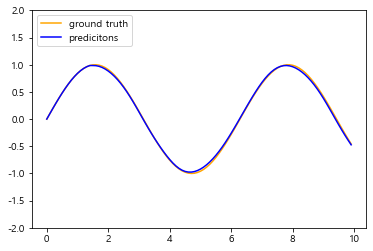

In [12]:
# 정답과 예측 결과 출력
plt.plot(test_x, calc_y, label="ground truth", color="orange") # target
plt.plot(test_x, test_y, label="predicitons", color="blue") # predict
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()